In [ ]:
#Code Source: https://github.com/WillKoehrsen/Data-Analysis/blob/master/recall_precision/recall_precision_example.ipynb

In [ ]:
#Description Source: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

In [ ]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
 
from IPython.core.pylabtools import figsize
 
figsize(10, 8)
 
results = pd.DataFrame({'threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        'tp': [50, 48, 47, 45, 44, 42, 36,  30,  20, 12, 0],
                        'fp': [50, 47, 40, 31, 23, 16, 12,  11,   4,  3,  0],
                        'tn': [0,   3,  9, 16, 22, 29, 34,  38,  43, 45, 50],
                        'fn': [0,   2,  4,  8, 11, 13, 18,  21,  33, 40, 50]
                       })
 
def calculate_metrics(results):
    roc = pd.DataFrame(index = results['threshold'], columns=['recall', 'precision', 'f1', 'tpr', 'fpr'])
    for i in results.iterrows():
        t, tp, fp, tn, fn = i[1]
        assert (tp + fp + tn + fn) == 100, 'Patients must add up to 100'
        
        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
 
        roc.loc[t]['recall'] = recall
        roc.loc[t]['precision'] = precision
        roc.loc[t]['f1'] = f1
        roc.loc[t]['tpr'] = true_positive_rate
        roc.loc[t]['fpr'] = false_positive_rate
       
    return roc
 
roc = calculate_metrics(results)
roc.reset_index()

,threshold,recall,precision,f1,tpr,fpr
0,0.0,1,0.5,0.666667,1,1
1,0.1,0.96,0.505263,0.662069,0.96,0.94
2,0.2,0.921569,0.54023,0.681159,0.921569,0.816327
3,0.3,0.849057,0.592105,0.697674,0.849057,0.659574
4,0.4,0.8,0.656716,0.721311,0.8,0.511111
5,0.5,0.763636,0.724138,0.743363,0.763636,0.355556
6,0.6,0.666667,0.75,0.705882,0.666667,0.26087
7,0.7,0.588235,0.731707,0.652174,0.588235,0.22449
8,0.8,0.377358,0.833333,0.519481,0.377358,0.0851064
9,0.9,0.230769,0.8,0.358209,0.230769,0.0625


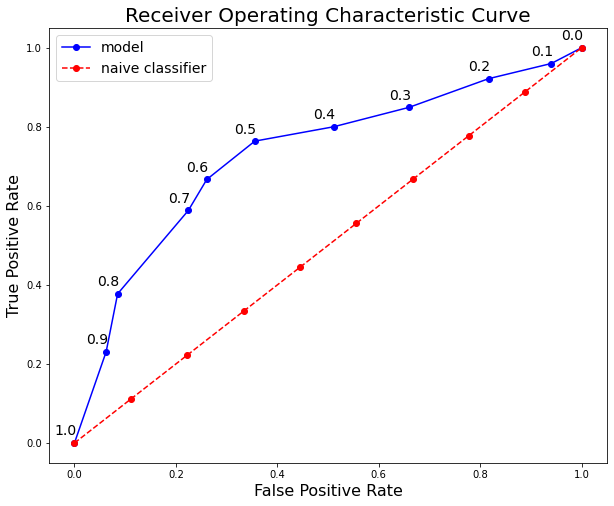

In [ ]:
figsize(10, 8)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in results['threshold']]
plt.plot(roc['fpr'], roc['tpr'], 'bo-', label = 'model');
plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive classifier');
for x, y, s in zip(roc['fpr'], roc['tpr'], thresholds):
    plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});

plt.legend(prop={'size':14})
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('Receiver Operating Characteristic Curve', size = 20);